In [1]:
import datetime
import folium
import importlib
import pandas as pd
import statistics

import SaveEcoBotFinder
import IdMatcher
import CamsWrapper

importlib.reload(SaveEcoBotFinder)
importlib.reload(IdMatcher)
importlib.reload(CamsWrapper)

from SaveEcoBotFinder import SaveEcoBotFinder
from IdMatcher import IdMatcher
from CamsWrapper import CamsWrapper

MATCHER = IdMatcher("співставлення ID постів з ID Cams.csv", bannedStations=[3504, 2762])
FINDER = SaveEcoBotFinder("/media/osamoile/data/Ecobot_16_11_2020")
CAMS = CamsWrapper("Cams_2019_2020_pm2.5_Kyiv.csv")

In [48]:

# m = folium.Map(location=[50.41671, 30.618716], zoom_start=12)

CAMS.filter("2019-01-02", 6377)

# for id in MATCHER.byCamsId(6564):
#     print(id)

    # post = FINDER.getById(id)
    # if post:
    #     value = post.getValue("2020-03-27")
    #     print(len(value))
        # coord = MATCHER.getCoordinates(id)

        # if value:
        #     folium.Circle(location=coord,
        #                   radius=10 * abs(value - 28.9),
        #                   popup=value).add_to(m)
        # else:
        #     folium.Marker(coord,
        #                   icon=folium.Icon(color='red', icon='info-sign'),
        #                   popup=value).add_to(m)

# m

[6.102425599999999, 6.046387200000001, 5.9947886, 5.2975311, 4.7469749000000006, 5.4869356, 6.5902386, 7.8441205, 8.8766403, 8.135026, 6.7598772, 7.12363, 8.717364300000002, 9.215000199999999, 9.0245752, 8.5381575, 8.2340708, 8.0050507, 7.778583, 7.514553500000001, 7.9158587, 7.904389900000001, 7.322299, 7.868450599999999]


In [3]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 1, 30)
delta = datetime.timedelta(days=1)

DATES = []
CAMS_IDS = []
VALUES = []

while start_date <= end_date:
    for cams_id in CAMS.uniqueCamsIds():
        str_date = start_date.strftime("%Y-%m-%d")
        values = CAMS.filter(str_date, cams_id)
        res = statistics.median(values)
        print("%s %d %f" % (str_date, cams_id, res))
        DATES.append(str_date)
        CAMS_IDS.append(cams_id)
        VALUES.append(res)
    start_date += delta

df = pd.DataFrame({"date": DATES, "id": CAMS_IDS, "value": VALUES})
df.to_csv("cams-avg.csv", index=False)

2020-01-01 6192 2.653503
2020-01-01 6193 3.457017
2020-01-01 6194 2.983234
2020-01-01 6377 4.770212
2020-01-01 6378 6.558997
2020-01-01 6379 6.355395
2020-01-01 6562 4.770212
2020-01-01 6563 6.558997
2020-01-01 6564 6.355395
2020-01-01 6747 5.960398
2020-01-01 6748 6.761637
2020-01-01 6749 7.247657
2020-01-02 6192 9.297203
2020-01-02 6193 11.660398
2020-01-02 6194 11.638158
2020-01-02 6377 11.523694
2020-01-02 6378 14.217602
2020-01-02 6379 13.948648
2020-01-02 6562 11.523694
2020-01-02 6563 14.217602
2020-01-02 6564 13.948648
2020-01-02 6747 12.440131
2020-01-02 6748 12.871280
2020-01-02 6749 13.318062
2020-01-03 6192 13.428347
2020-01-03 6193 24.267852
2020-01-03 6194 24.715481
2020-01-03 6377 23.029449
2020-01-03 6378 30.660989
2020-01-03 6379 31.060370
2020-01-03 6562 23.029449
2020-01-03 6563 30.660989
2020-01-03 6564 31.060370
2020-01-03 6747 20.554645
2020-01-03 6748 23.827544
2020-01-03 6749 27.878411
2020-01-04 6192 14.525481
2020-01-04 6193 18.755793
2020-01-04 6194 19.522762

In [4]:
LAND = pd.read_csv("back-up.csv", header=None,
                   names=["date", "id", "value", "len"])
LAND = LAND[LAND["date"] <= "2020-01-30"]
CAMS_DF = df
CAMS_COL = []

for index, row in LAND.iterrows():
    post_id = row["id"]
    date = row["date"]
    cams_id = MATCHER.getCamsIdByPostId(post_id)
    res = CAMS_DF[(CAMS_DF["date"] == date)
                  & (CAMS_DF["id"] == cams_id)]
    CAMS_COL.append(res.iloc[0]["value"])

LAND['cams'] = CAMS_COL
print(LAND)

            date    id  value  len      cams
0     2020-01-01  4252   0.00    0  2.653503
1     2020-01-01   915   4.25   24  3.457017
2     2020-01-01  3396   0.00    0  3.457017
3     2020-01-01  3600   0.00    0  3.457017
4     2020-01-01  3622   0.00    0  3.457017
...          ...   ...    ...  ...       ...
4675  2020-01-30  3690   0.00    0  8.792019
4676  2020-01-30  3692   0.00    0  8.792019
4677  2020-01-30  3693   0.00    0  8.792019
4678  2020-01-30  3694   0.00    0  8.792019
4679  2020-01-30  4219   0.00    0  8.792019

[4680 rows x 5 columns]


            date    id   value   len       cams
1     2020-01-01   915   4.250    24   3.457017
14    2020-01-01  1098   1.530   573   4.770212
15    2020-01-01  1372   2.500   552   4.770212
16    2020-01-01  1437   2.460   545   4.770212
24    2020-01-01   109   2.400  1095   6.558997
...          ...   ...     ...   ...        ...
4644  2020-01-30  1115   7.735   968  10.229302
4648  2020-01-30  1193  10.000   472  10.229302
4650  2020-01-30  2781  21.600    15  10.229302
4651  2020-01-30  3070  12.810   983  10.229302
4671  2020-01-30  2973   6.470   543   8.792019

[1195 rows x 5 columns]


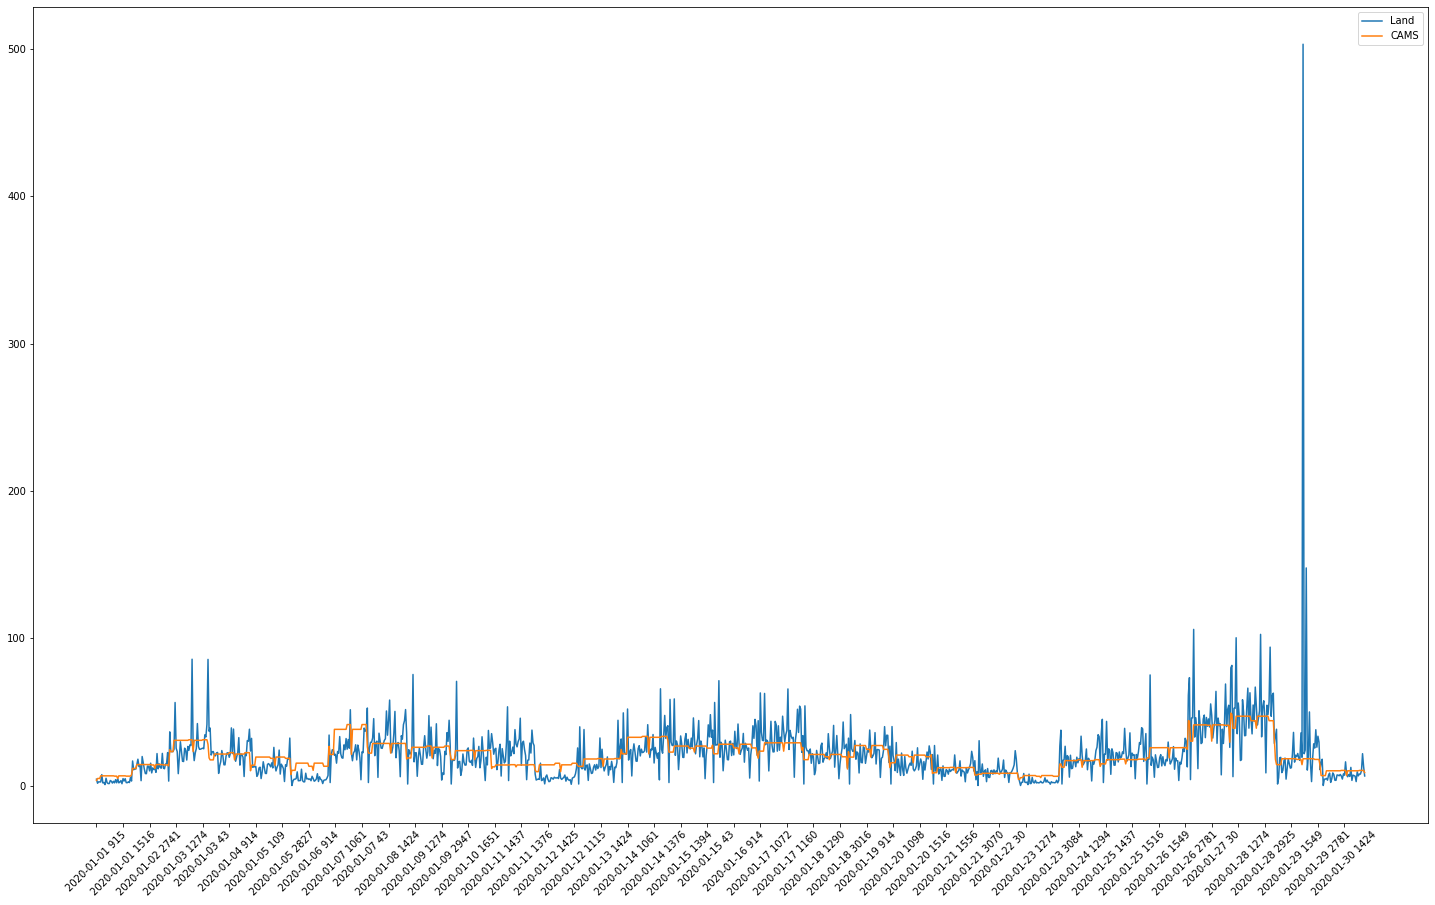

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

LAND = LAND[LAND["len"] > 0]
print(LAND)

fig, ax = plt.subplots(figsize=(25, 15))
label = LAND["date"] + " " + LAND["id"].astype(str)
ax.plot(label, LAND["value"], label='Land')
ax.plot(label, LAND["cams"],  label='CAMS')
ax.legend(loc='upper right')
plt.xticks(rotation=45)
ax.set_xticks(np.arange(0, len(label)+1, 25))
plt.show()

In [51]:
# R
LAND["value"].corr(LAND["cams"], method='pearson')

0.46040812232463746

In [9]:
from sklearn.metrics import mean_squared_error

# RMSE
err = mean_squared_error(LAND["value"].tolist(), LAND["cams"].tolist(), squared=False)
print(err)
err / statistics.mean(LAND["value"].tolist())

18.50301185012541


0.8716149192084914

In [54]:
from sklearn.metrics import r2_score

# R^2
r2_score(LAND["value"].tolist(), LAND["cams"].tolist())

0.21195007102256103